**1. Data Extraction & Visualization: Kenya's Electricity Generation & Demand**

In [1]:
import pandas as pd

In [2]:
generation_df = pd.read_csv('../data/electricity_generation_data/electricity-generation.csv')
generation_df 

Entity Code  Year  Electricity generation - TWh
0     ASEAN (Ember)  NaN  2000                        378.61
1     ASEAN (Ember)  NaN  2001                        404.85
2     ASEAN (Ember)  NaN  2002                        433.19
3     ASEAN (Ember)  NaN  2003                        458.24
4     ASEAN (Ember)  NaN  2004                        496.56
...             ...  ...   ...                           ...
7407       Zimbabwe  ZWE  2018                          9.44
7408       Zimbabwe  ZWE  2019                          8.49
7409       Zimbabwe  ZWE  2020                          6.71
7410       Zimbabwe  ZWE  2021                          8.46
7411       Zimbabwe  ZWE  2022                          8.93

[7412 rows x 4 columns]

In [3]:
# Extract Kenya's electricity generation data from generation_df
kenya_generation_df = generation_df[generation_df['Entity'] == 'Kenya'].reset_index(drop=True)
kenya_generation_df.head()

Entity Code  Year  Electricity generation - TWh
0  Kenya  KEN  2000                          4.31
1  Kenya  KEN  2001                          4.81
2  Kenya  KEN  2002                          5.15
3  Kenya  KEN  2003                          5.48
4  Kenya  KEN  2004                          6.16

In [4]:
demand_df = pd.read_csv('../data/electricity_generation_data/electricity-demand.csv')
demand_df

Entity Code  Year  Electricity demand - TWh
0     ASEAN (Ember)  NaN  2000                    378.61
1     ASEAN (Ember)  NaN  2001                    404.85
2     ASEAN (Ember)  NaN  2002                    433.19
3     ASEAN (Ember)  NaN  2003                    458.24
4     ASEAN (Ember)  NaN  2004                    496.56
...             ...  ...   ...                       ...
5858       Zimbabwe  ZWE  2018                     10.46
5859       Zimbabwe  ZWE  2019                      9.60
5860       Zimbabwe  ZWE  2020                      8.69
5861       Zimbabwe  ZWE  2021                     10.20
5862       Zimbabwe  ZWE  2022                     10.69

[5863 rows x 4 columns]

In [5]:
# Extract Kenya's electricity demand data from the demand_df
kenya_demand_df = demand_df[demand_df['Entity'] == 'Kenya'].reset_index(drop=True)
kenya_demand_df.head()

Entity Code  Year  Electricity demand - TWh
0  Kenya  KEN  2000                      4.51
1  Kenya  KEN  2001                      4.98
2  Kenya  KEN  2002                      5.37
3  Kenya  KEN  2003                      5.67
4  Kenya  KEN  2004                      6.32

In [6]:
# Merge Kenya's electricity generation and demand data into a single dataframe
electricity_df = pd.merge(
    kenya_demand_df[['Year', 'Electricity demand - TWh']],
    kenya_generation_df[['Year', 'Electricity generation - TWh']],
    on='Year',
    how='inner'
)

electricity_df.head()

Year  Electricity demand - TWh  Electricity generation - TWh
0  2000                      4.51                          4.31
1  2001                      4.98                          4.81
2  2002                      5.37                          5.15
3  2003                      5.67                          5.48
4  2004                      6.32                          6.16

In [7]:
min_year = electricity_df['Year'].min()
max_year = electricity_df['Year'].max()
print(f"The dataset covers years from {min_year} to {max_year}.")

The dataset covers years from 2000 to 2023.


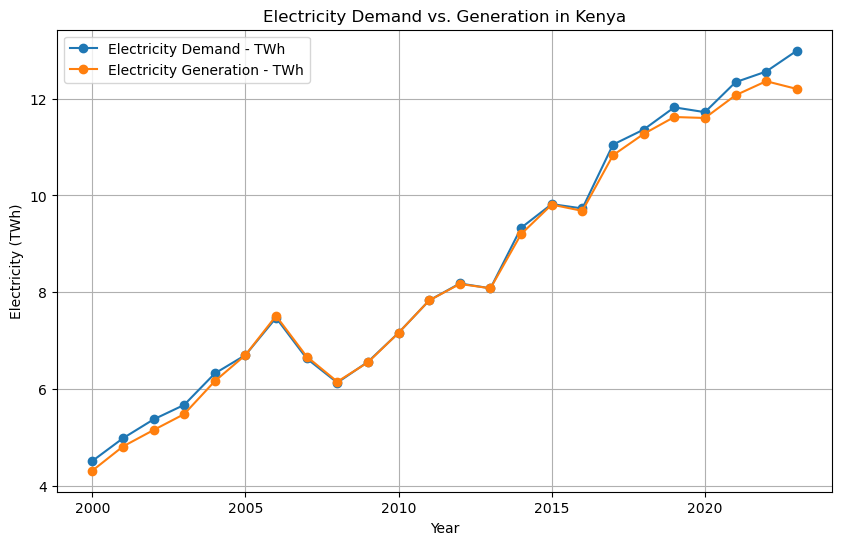

In [8]:
# Visualize Kenya's electricity demand and generation

import matplotlib.pyplot as plt

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(electricity_df['Year'], electricity_df['Electricity demand - TWh'], label='Electricity Demand - TWh', marker='o')
plt.plot(electricity_df['Year'], electricity_df['Electricity generation - TWh'], label='Electricity Generation - TWh', marker='o')


plt.xlabel('Year')
plt.ylabel('Electricity (TWh)')
plt.title('Electricity Demand vs. Generation in Kenya')
plt.legend()
plt.grid(True)

plt.show()

**2. Data Extraction and Visualization: Renewable Potential**

*a. Wind Potential*

In [9]:
import rasterio

file_path = '../data/renewable_potential_data/kenya_renewable_data/kenya_wind-speed_100m.tif'

# Open the .tif file using rasterio
with rasterio.open(file_path) as src:
    raster_data = src.read(1)  # Read the first band
    profile = src.profile     # Get metadata for the file

profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [10]:
import numpy as np
# Get NoData value from the metadata
nodata_value = profile.get('nodata', -9999)

# Find and count NoData values in the array
nodata_count = np.sum(raster_data == nodata_value)
print(f"NoData values count: {nodata_count}")

NoData values count: 0


In [11]:
# Open the TIFF file
with rasterio.open('../data/renewable_potential_data/kenya_renewable_data/kenya_wind-speed_100m.tif') as src:
    # Print metadata
    print("Metadata:", src.meta)
    
    # Print dimensions (height and width) and number of bands
    print("Dimensions (Height x Width):", src.height, "x", src.width)
    print("Number of Bands:", src.count)
    
    # Print coordinate reference system (CRS)
    print("Coordinate Reference System (CRS):", src.crs)
    
    # Print affine transformation (mapping coordinates to array indices)
    print("Affine Transformation:", src.transform)

    # Read the first band and print a portion of pixel values as an example
    band1 = src.read(1)  # Read the first band
    print("Sample Pixel Values (Top-left corner):\n", band1[:5, :5])

Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392)}
Dimensions (Height x Width): 3806 x 4149
Number of Bands: 1
Coordinate Reference System (CRS): GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
Affine Transformation: | 0.00, 0.00, 33.91|
| 0.00,-0.00, 4.62|
| 0.00, 0.00, 1.00|
Sample Pixel Values (Top-left corner):
 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan na

In [12]:
# Check the no data value
no_data_value = src.nodata

# Create a mask for the no data values
masked_data = np.ma.masked_equal(raster_data, no_data_value)

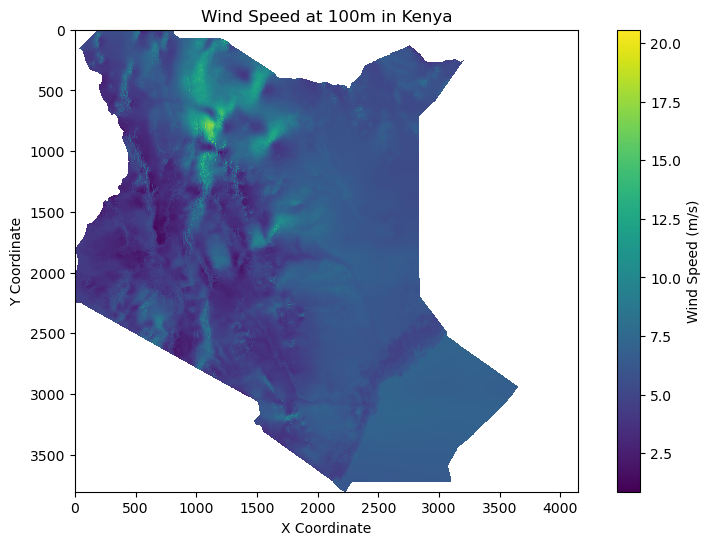

In [13]:
plt.figure(figsize=(10, 6))
plt.title('Wind Speed at 100m in Kenya')
plt.imshow(masked_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

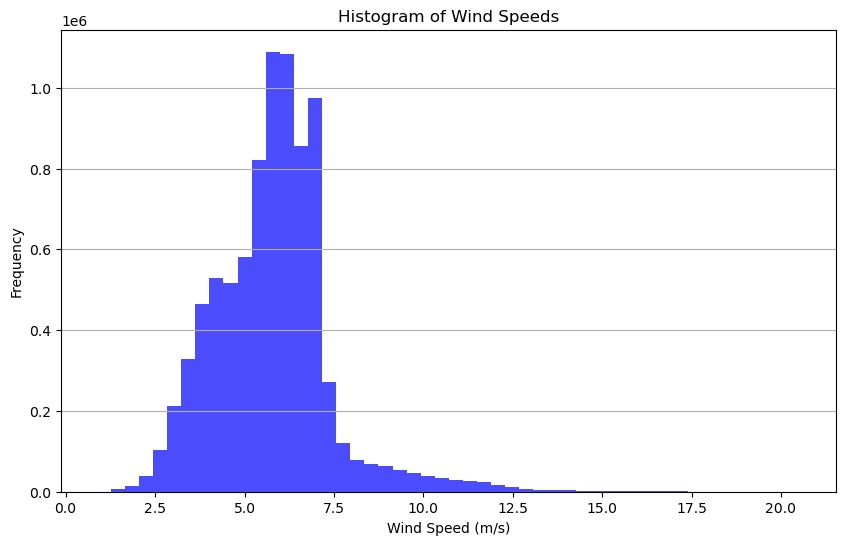

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Identify areas with high average wind speeds, which may be potential sites for wind energy development:

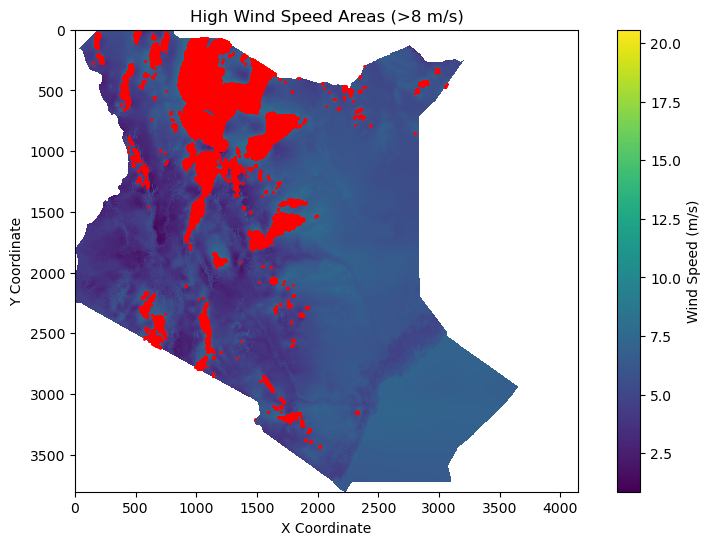

In [15]:
# Define a threshold for high wind speed
high_wind_threshold = 8  # m/s, adjust based on your criteria
high_wind_areas = np.where(masked_data > high_wind_threshold)

# Plot high wind areas
plt.figure(figsize=(10, 6))
plt.imshow(masked_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Wind Speed (m/s)')
plt.scatter(high_wind_areas[1], high_wind_areas[0], color='red', s=1)  # s is the size of points
plt.title('High Wind Speed Areas (>8 m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

In [16]:
# Load the wind TIFF file
wind_speed = '../data/renewable_potential_data/kenya_renewable_data/kenya_wind-speed_100m.tif'

with rasterio.open(wind_speed) as src:
    # Read the wind speed data from the first band
    wind_data = src.read(1)
    transform = src.transform

# List to store latitude, longitude, and wind speed values
data = []

# Loop over each pixel
for row in range(wind_data.shape[0]):
    for col in range(wind_data.shape[1]):
        # Convert row, col to latitude, longitude
        lon, lat = rasterio.transform.xy(transform, row, col)
        wind_speed = wind_data[row, col]

        # Append to data list if wind speed is valid (not a nodata value)
        if not np.isnan(wind_speed):
            data.append({'Latitude': lat, 'Longitude': lon, 'Wind Speed': wind_speed})

wind_speed_df = pd.DataFrame(data)
print(wind_speed_df)

         Latitude  Longitude  Wind Speed
0        4.622019  35.915323    6.276936
1        4.622019  35.917823    6.260634
2        4.622019  35.920323    6.232945
3        4.622019  35.922823    6.241162
4        4.622019  35.925323    6.216225
...           ...        ...         ...
8538058 -4.887981  39.480323    6.142080
8538059 -4.890481  39.472823    6.143734
8538060 -4.890481  39.475323    6.142651
8538061 -4.890481  39.477823    6.141578
8538062 -4.890481  39.480323    6.140533

[8538063 rows x 3 columns]


In [17]:
wind_speed_df.head()

Latitude  Longitude  Wind Speed
0  4.622019  35.915323    6.276936
1  4.622019  35.917823    6.260634
2  4.622019  35.920323    6.232945
3  4.622019  35.922823    6.241162
4  4.622019  35.925323    6.216225

*b. Photovoltaic Potential*

In [18]:
import rasterio

file_path = '../data/renewable_potential_data/kenya_renewable_data/Kenya_PVOUT_poster-map_1000x1000mm-300dpi_v20191017.tif'

with rasterio.open(file_path) as src:
    # Get the number of bands
    num_bands = src.count
    print("Number of Bands:", num_bands)

Number of Bands: 4


c:\Users\DAVE\anaconda3\Lib\site-packages\rasterio\__init__.py:367: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [19]:
# Open the .tif file using rasterio
with rasterio.open(file_path) as src:
    raster_data_pvt = src.read(1)
    profile = src.profile


print("Metadata:", profile)

Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 11811, 'height': 11811, 'count': 4, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockxsize': 11811, 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}


In [20]:
import numpy as np

# Mask no data values
manual_nodata_value = -9999
masked_data_pvt = np.ma.masked_equal(raster_data_pvt, manual_nodata_value)

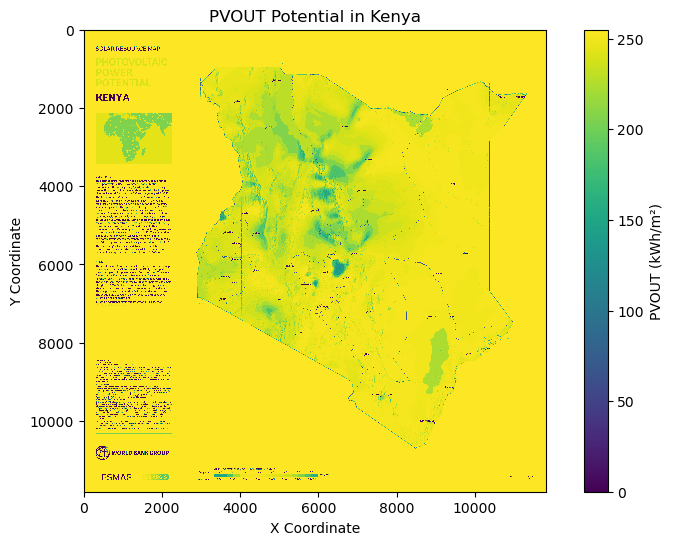

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(masked_data_pvt, cmap='viridis', interpolation='nearest')
plt.colorbar(label='PVOUT (kWh/m²)')
plt.title('PVOUT Potential in Kenya')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

In [22]:
# Check for NoData Values
nodata_value_pvt = profile.get('nodata', None)

# Find and count NoData values in the array if a NoData value is specified
if nodata_value_pvt is not None:
    nodata_count_pvt = np.sum(raster_data_pvt == nodata_value_pvt)
    print(f"NoData values count: {nodata_count_pvt}")
else:
    print("No NoData value specified in the file.")

No NoData value specified in the file.


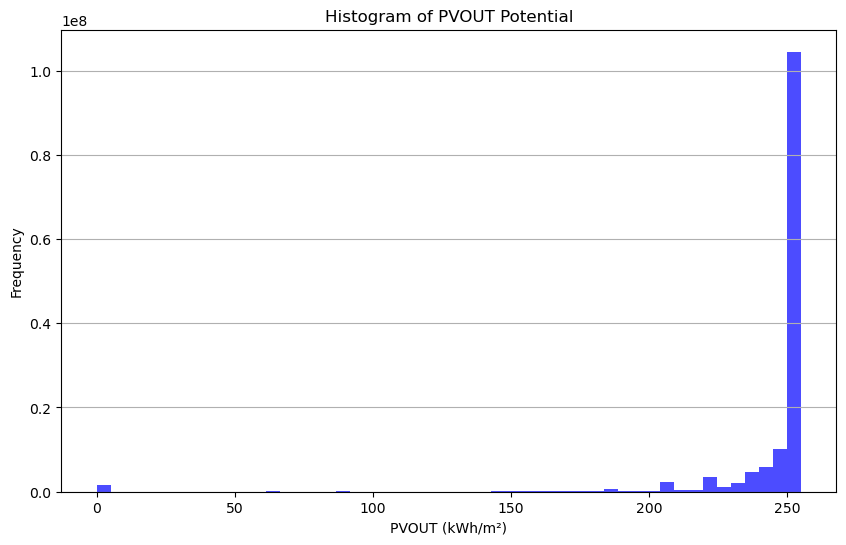

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(masked_data_pvt.compressed() if nodata_value_pvt is not None else raster_data_pvt.ravel(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of PVOUT Potential')
plt.xlabel('PVOUT (kWh/m²)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

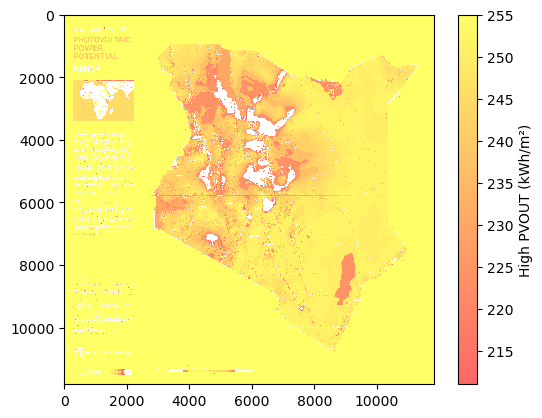

In [24]:
# Define a threshold for high PVOUT areas
PVOUT_threshold = 210 

# Mask for high PVOUT areas
high_pvout_mask = np.where(raster_data_pvt > PVOUT_threshold, raster_data_pvt, np.nan)

# Overlay high PVOUT areas
plt.imshow(high_pvout_mask, cmap='autumn', interpolation='nearest', alpha=0.6)
plt.colorbar(label='High PVOUT (kWh/m²)')
plt.show()

In [25]:
# Open the .tif file and read the required data
with rasterio.open(file_path) as src:
    raster_data_pvt = src.read(1)  # Read only the first band
    profile = src.profile
    nodata_value_pvt = profile.get('nodata', -9999)

# Mask NoData values efficiently
masked_data_pvt = np.where(raster_data_pvt == nodata_value_pvt, np.nan, raster_data_pvt)

# Store the processed dataset as a compressed .npz file
np.savez_compressed("kenya_pvout_data.npz", data=masked_data_pvt)

In [26]:
# # Load the data from the .npz file
# data = np.load("kenya_pvout_data.npz")
# masked_data_pvt = data['data']

# # Get the shape of the data
# rows, cols = masked_data_pvt.shape

# # Create a list of coordinates and values
# data_list = [
#     {"x": x, "y": y, "PVOUT": masked_data_pvt[y, x]}
#     for y in range(rows)
#     for x in range(cols)
#     if not np.isnan(masked_data_pvt[y, x])  # Ignore NoData values
# ]

# # Convert the list to a DataFrame
# df = pd.DataFrame(data_list)

# # Display the first few rows to confirm
# print(df.head())

In [27]:
# # Load the compressed .npz file
# data = np.load("kenya_pvout_data.npz")
# masked_data_pvt = data['data']

# # Get the shape of the data
# rows, cols = masked_data_pvt.shape

# # Define chunk size
# chunk_size = 100  # Process 100 rows at a time to save memory

# # Create a generator to yield data in chunks
# def data_generator(data, rows, cols, chunk_size):
#     for start_row in range(0, rows, chunk_size):
#         end_row = min(start_row + chunk_size, rows)
#         data_list = [
#             {"x": x, "y": y, "PVOUT": data[y, x]}
#             for y in range(start_row, end_row)
#             for x in range(cols)
#             if not np.isnan(data[y, x])
#         ]
#         yield pd.DataFrame(data_list)

# # Save data to a CSV file in chunks
# output_file = "kenya_pvout_data.csv"
# for i, chunk_df in enumerate(data_generator(masked_data_pvt, rows, cols, chunk_size)):
#     if i == 0:
#         # Write header in the first chunk
#         chunk_df.to_csv(output_file, index=False, mode='w')
#     else:
#         # Append without writing header
#         chunk_df.to_csv(output_file, index=False, mode='a', header=False)

In [28]:
# print("Data saved to 'kenya_pvout_data.csv'")

In [29]:
# kenya_pvout_df =pd.read_csv('kenya_pvout_data.csv')
# kenya_pvout_df.head()

In [30]:
# kenya_pvout_df.count

In [31]:

# # Load the .npz file
# data = np.load("kenya_pvout_data.npz")
# masked_data_pvt = data['data']

# # Define Kenya's bounding box for latitude and longitude
# min_latitude, max_latitude = -5.0, 5.0
# min_longitude, max_longitude = 33.5, 42.0

# # Load the .tif file to get the transformation information
# file_path = '../data/renewable_potential_data/kenya_renewable_data/Kenya_PVOUT_poster-map_1000x1000mm-300dpi_v20191017.tif'
# with rasterio.open(file_path) as src:
#     transform = src.transform
#     rows, cols = masked_data_pvt.shape

# # Define chunk size
# chunk_size = 100

# # Function to convert row, col indices to latitude, longitude
# def index_to_latlon(row, col, transform):
#     x, y = rasterio.transform.xy(transform, row, col, offset='center')
#     return y, x  # return latitude, longitude

# # Data generator to filter and yield data within Kenya’s bounding box
# def kenya_data_generator(data, rows, cols, chunk_size, transform):
#     for start_row in range(0, rows, chunk_size):
#         end_row = min(start_row + chunk_size, rows)
#         data_list = []
#         for y in range(start_row, end_row):
#             for x in range(cols):
#                 if not np.isnan(data[y, x]):
#                     latitude, longitude = index_to_latlon(y, x, transform)
#                     # Check if the coordinates are within Kenya's bounding box
#                     if (min_latitude <= latitude <= max_latitude) and (min_longitude <= longitude <= max_longitude):
#                         data_list.append({"longitude": longitude, "latitude": latitude, "PVOUT": data[y, x]})
#         if data_list:  # Yield only non-empty lists
#             yield pd.DataFrame(data_list)

# # Save filtered data to a CSV file in chunks
# output_file = "kenya_filtered_pvout_data.csv"
# for i, chunk_df in enumerate(kenya_data_generator(masked_data_pvt, rows, cols, chunk_size, transform)):
#     if i == 0:
#         # Write header in the first chunk
#         chunk_df.to_csv(output_file, index=False, mode='w')
#     else:
#         # Append without writing header
#         chunk_df.to_csv(output_file, index=False, mode='a', header=False)

# print("Filtered data for Kenya saved to 'kenya_filtered_pvout_data.csv'")

**3. Data Extraction & Visualization: Kenya's Population Density**

In [32]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import LineString, Point
import rasterio as rio
import io
import shapely
import fiona

In [33]:
# Kenya's population density: 2000
pop_density2000 = gpd.read_file('../data/pop_density_data/pop_density_data/2000.csv', engine='pyogrio')
pop_density2000 = pop_density2000.astype({
    'X':float,
    'Y':float,
    'Z':float})

# Kenya's population density: 2020
pop_density2020 = gpd.read_file('../data/pop_density_data/pop_density_data/2020.csv', engine='pyogrio')
pop_density2020 = pop_density2020.astype({
    'X':float,
    'Y':float,
    'Z':float})


print('Kenyas Population Density: 2000', pop_density2000.head())

print('Kenyas Population Density: 2020', pop_density2020.head())


Kenyas Population Density: 2000            X         Y         Z
0  35.244583  5.462084  1.416720
1  35.252917  5.462084  1.413419
2  35.261250  5.462084  1.418887
3  35.269583  5.462084  1.457395
4  35.277917  5.462084  1.512301
Kenyas Population Density: 2020            X         Y          Z
0  35.244583  5.462084  52.668011
1  35.252917  5.462084  42.566807
2  35.261250  5.462084  39.304050
3  35.269583  5.462084  41.851067
4  35.277917  5.462084  38.238289


In [34]:
# 2000 Geometry
pop_density2000 = gpd.GeoDataFrame(
    pop_density2000, geometry=gpd.points_from_xy(pop_density2000.X, pop_density2000.Y), crs="EPSG:4326"
).drop(columns=['X','Y']).rename(columns={'Z':'Density'})

# 2020 Geometry
pop_density2020 = gpd.GeoDataFrame(
    pop_density2020, geometry=gpd.points_from_xy(pop_density2020.X, pop_density2020.Y), crs="EPSG:4326"
).drop(columns=['X','Y']).rename(columns={'Z':'Density'})


print('Kenyas Population Density Geometry: 2000', pop_density2020.head())
print('Kenyas Population Density Geometry: 2020', pop_density2000.head())

Kenyas Population Density Geometry: 2000      Density                  geometry
0  52.668011  POINT (35.24458 5.46208)
1  42.566807  POINT (35.25292 5.46208)
2  39.304050  POINT (35.26125 5.46208)
3  41.851067  POINT (35.26958 5.46208)
4  38.238289  POINT (35.27792 5.46208)
Kenyas Population Density Geometry: 2020     Density                  geometry
0  1.416720  POINT (35.24458 5.46208)
1  1.413419  POINT (35.25292 5.46208)
2  1.418887  POINT (35.26125 5.46208)
3  1.457395  POINT (35.26958 5.46208)
4  1.512301  POINT (35.27792 5.46208)


In [35]:
desc_pop_density2000 = pop_density2000.Density.describe(percentiles=[.95])
print('Kenyas Population Density Decription: 2000', desc_pop_density2000)

desc_pop_density2020 = pop_density2020.Density.describe(percentiles=[.95])
print('Kenyas Population Density Decription: 2020', desc_pop_density2020)

Kenyas Population Density Decription: 2000 count    680385.000000
mean         50.927232
std         320.932973
min           0.000000
50%           4.618363
95%         259.467688
max       73272.679688
Name: Density, dtype: float64
Kenyas Population Density Decription: 2020 count    680262.000000
mean         95.214693
std         661.822734
min           0.000000
50%          12.548709
95%         438.835638
max      167454.390625
Name: Density, dtype: float64


In [36]:
ke_counties = gpd.read_file('../data/income_level_data/GSAP_AM24_2021.shp', engine='pyogrio',
                                   where="code='KEN'")

ke_counties.head()

code  geo_year geo_source geo_level geo_idvar   geo_id geo_nvar  \
0  KEN    2022.0       GADM         1     GID_1  KEN.1_1   NAME_1   
1  KEN    2022.0       GADM         1     GID_1  KEN.2_1   NAME_1   
2  KEN    2022.0       GADM         1     GID_1  KEN.3_1   NAME_1   
3  KEN    2022.0       GADM         1     GID_1  KEN.4_1   NAME_1   
4  KEN    2022.0       GADM         1     GID_1  KEN.5_1   NAME_1   

          geo_name                geo_code  \
0          Baringo  KEN_2022_GADM1_KEN.1_1   
1            Bomet  KEN_2022_GADM1_KEN.2_1   
2          Bungoma  KEN_2022_GADM1_KEN.3_1   
3            Busia  KEN_2022_GADM1_KEN.4_1   
4  Elgeyo-Marakwet  KEN_2022_GADM1_KEN.5_1   

                                            geometry  
0  MULTIPOLYGON (((35.73880 -0.19544, 35.72428 -0...  
1  POLYGON ((35.26033 -1.01608, 35.26021 -1.01621...  
2  POLYGON ((34.91305 0.85131, 34.91327 0.85148, ...  
3  POLYGON ((34.02698 -0.01568, 34.02082 -0.02018...  
4  MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2...

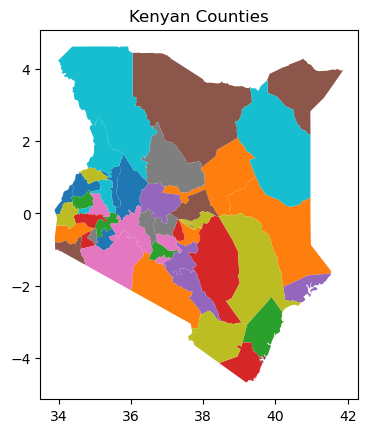

In [37]:
import matplotlib.pyplot as plt

ax = ke_counties.plot(column='geo_name')
ax.set_title("Kenyan Counties")
plt.show()

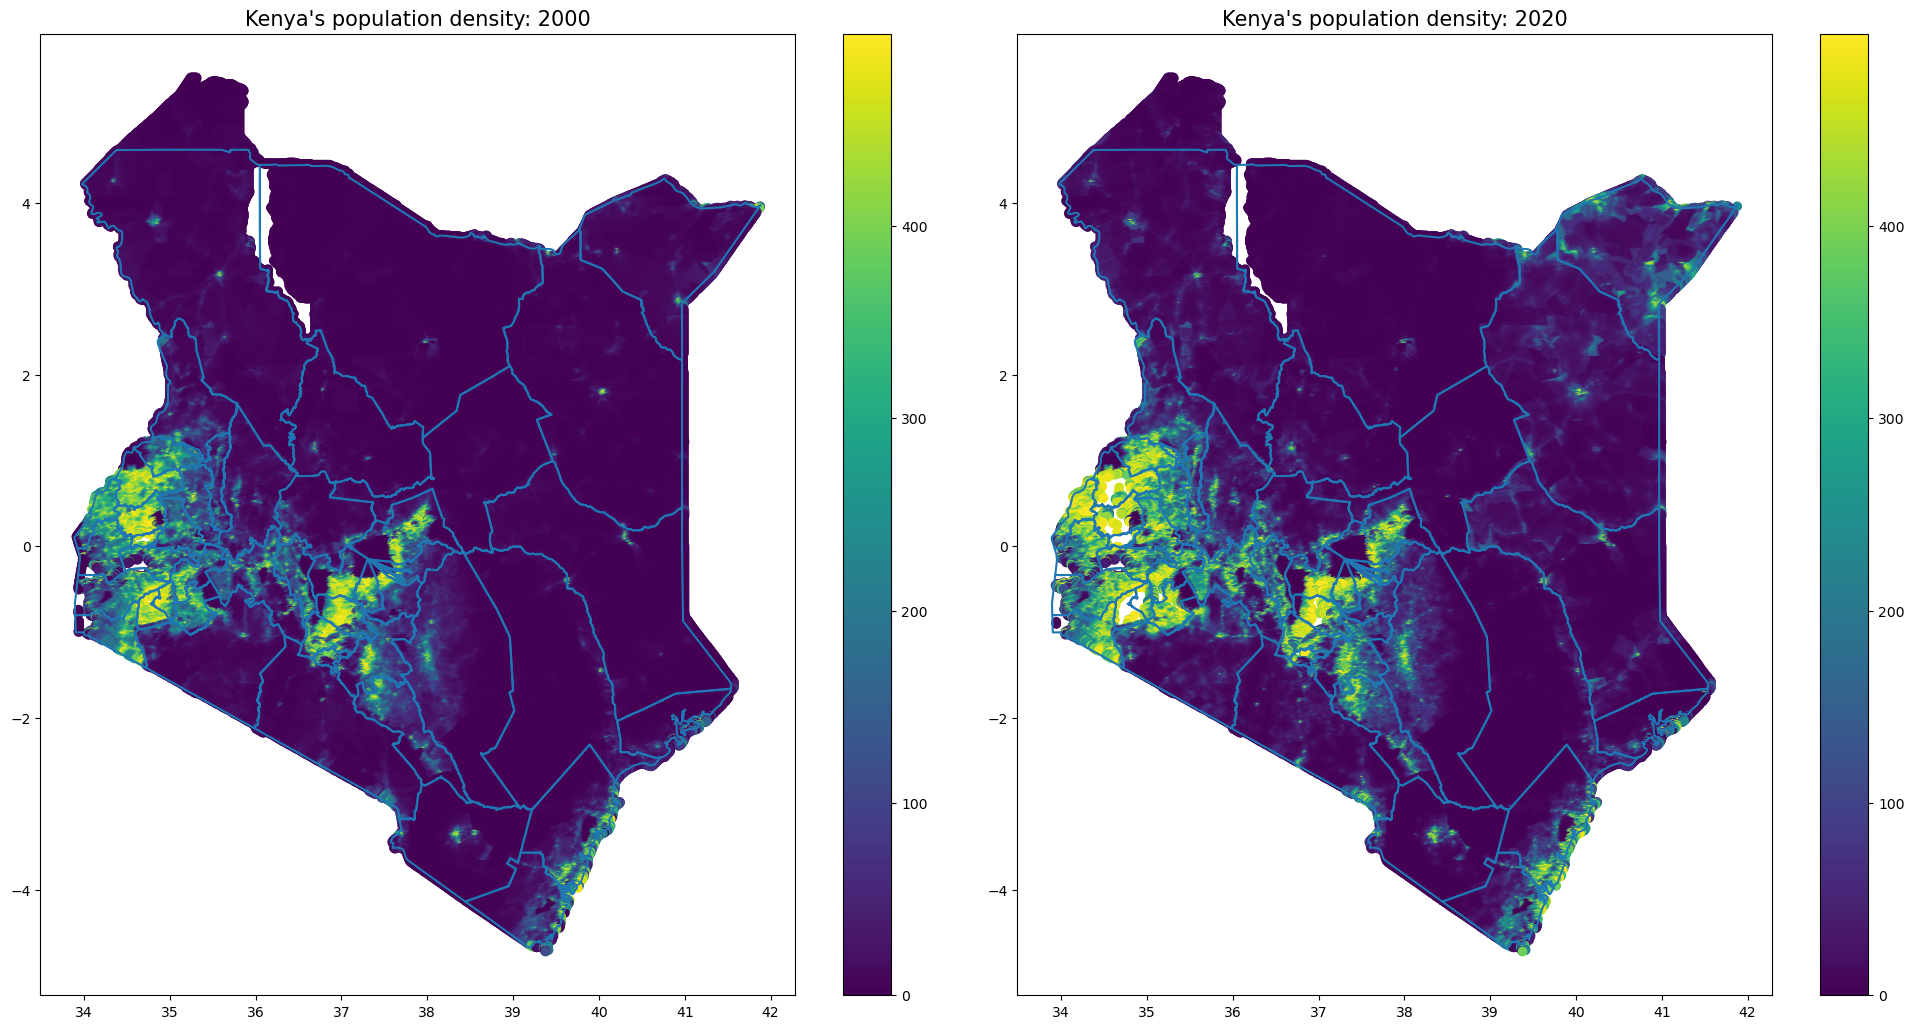

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Kenya's population density: 2000
base1 = ke_counties.boundary.plot(ax=axes[0])
pop_density2000.query('Density < 500').plot(ax=base1, column='Density', legend=True)
axes[0].set_title("Kenya's population density: 2000", fontsize=15)

# Kenya's population density: 2020
base2 = ke_counties.boundary.plot(ax=axes[1])
pop_density2020.query('Density < 500').plot(ax=base2, column='Density', legend=True)
axes[1].set_title("Kenya's population density: 2020", fontsize=15)

plt.tight_layout()
plt.show()


In [39]:
import glob
import os

# Define the path to your CSV files
path = '../data/pop_density_data/pop_density_data'
pop_files = glob.glob(path + "/*.csv")

# Initialize a list to hold each DataFrame
pop_dfs = []

# Loop over each file to process it
for file in pop_files:
    year = os.path.basename(file).split('.')[0]
    pop_df = pd.read_csv(file)
    pop_df = pop_df.rename(columns={'Z': year, 'X':'Latitude', 'Y':'Longitude'})

    # Append the DataFrame to the list
    pop_dfs.append(pop_df)

# Merge all DataFrames on 'X' and 'Y' columns
pop_density_df = pop_dfs[0]
for pop_df in pop_dfs[1:]:
    pop_density_df = pop_density_df.merge(pop_df, on=['Latitude', 'Longitude'], how='outer')

pop_density_df

Latitude  Longitude        2000        2001        2002        2003  \
0       33.911250   0.112084    0.000000         NaN         NaN         NaN   
1       33.919583   0.087084    0.000000         NaN         NaN         NaN   
2       33.919583   0.112084    0.000000         NaN         NaN         NaN   
3       33.919583   0.120417    0.000000         NaN         NaN         NaN   
4       33.927917   0.053750    0.000000         NaN         NaN         NaN   
...           ...        ...         ...         ...         ...         ...   
680380  41.869583   3.937084  397.773865  457.913635  530.126038  568.024841   
680381  41.869583   3.945417  359.506500  444.072296  449.517883  487.438477   
680382  41.869583   3.953750  216.237427  209.201828  189.976120  207.793716   
680383  41.877917   3.953750  177.267853  200.703415  186.920654  182.440414   
680384  41.877917   3.962084  122.937309  133.446503   93.444855   99.783760   

              2004        2005        2006        2007  ...         2011  \
0              NaN         NaN         NaN         NaN  ...          NaN   
1              NaN         NaN         NaN         NaN  ...          NaN   
2              NaN         NaN         NaN         NaN  ...          NaN   
3              NaN         NaN         NaN         NaN  ...          NaN   
4              NaN         NaN         NaN         NaN  ...          NaN   
...            ...         ...         ...         ...  ...          ...   
680380  633.726624  651.527588  722.150391  762.532471  ...  1104.948486   
680381  567.575745  615.064270  662.230286  748.843994  ...  1068.191284   
680382  216.922272  259.516571  296.011261  336.876770  ...   464.318909   
680383  203.349503  212.338882  267.996277  282.157074  ...   358.103180   
680384  108.784492  110.324257   96.035744  104.864914  ...   123.776337   

               2012         2013         2014         2015         2016  \
0               NaN          NaN          NaN          NaN          NaN   
1               NaN          NaN          NaN          NaN          NaN   
2               NaN          NaN          NaN          NaN          NaN   
3               NaN          NaN          NaN          NaN          NaN   
4               NaN          NaN          NaN          NaN          NaN   
...             ...          ...          ...          ...          ...   
680380  1098.559082  1220.617310  1352.360596  1371.986328  1647.830444   
680381  1043.916626  1178.744507  1248.533691  1338.666138  1549.040283   
680382   395.187317   506.484711   497.676514   672.169312   759.962036   
680383   485.205383   603.936340   489.138672   633.818054   589.724304   
680384   142.612640   121.610352   187.797638   211.193024   235.005112   

               2017         2018         2019         2020  
0               NaN          NaN          NaN          NaN  
1               NaN          NaN          NaN          NaN  
2               NaN          NaN          NaN          NaN  
3               NaN          NaN          NaN          NaN  
4               NaN          NaN          NaN          NaN  
...             ...          ...          ...          ...  
680380  1829.646973  1966.857178  2204.832275  2448.392334  
680381  1668.215942  1825.489380  1995.366821  2150.297363  
680382   791.770508   879.672729   960.955994  1003.680115  
680383   649.297668   709.577026   828.931519   835.522095  
680384   207.421356   247.293274   242.199768   236.638214  

[680385 rows x 23 columns]

In [40]:
pop_density_df.isna().sum()

Latitude         0
Longitude        0
2000             0
2001           123
2002           123
2003           123
2004           123
2005           123
2006           123
2007           123
2008           123
2009           123
2010           123
2011           123
2012         15620
2013           123
2014           123
2015           123
2016           123
2017           123
2018           123
2019           123
2020           123
dtype: int64

In [41]:
desc = pop_density_df.describe()

pop_density_df_median = pop_density_df.median()
pop_density_df_mode = pop_density_df.mode().iloc[0]

# Add median and mode to the summary statistics
desc.loc['median'] = pop_density_df_median
desc.loc['mode'] = pop_density_df_mode

desc

Latitude      Longitude           2000           2001  \
count   680385.000000  680385.000000  680385.000000  680262.000000   
mean        37.861907       0.573581      50.927232      52.459902   
std          1.913418       2.243391     320.932973     338.698894   
min         33.911250      -4.721250       0.000000       0.000000   
25%         36.252917      -1.179583       1.313963       1.213779   
50%         37.961250       0.545417       4.618363       4.307683   
75%         39.461250       2.437084      19.172338      18.049306   
max         41.877917       5.462084   73272.679688   78880.398438   
median      37.961250       0.545417       4.618363       4.307683   
mode        39.219583      -1.012916       0.000000       0.000000   

                 2002           2003           2004           2005  \
count   680262.000000  680262.000000  680262.000000  680262.000000   
mean        54.000005      55.613002      57.289448      59.018250   
std        349.132566     361.373502     374.837981     387.024269   
min          0.000000       0.000000       0.000000       0.000000   
25%          1.243484       1.267215       1.248924       1.305102   
50%          4.510057       4.749110       4.849887       5.124676   
75%         18.899896      19.815576      19.939114      21.113575   
max      82250.742188   87578.140625   90830.289062   95338.015625   
median       4.510057       4.749110       4.849887       5.124676   
mode         0.000000       0.000000       0.000000       0.000000   

                 2006           2007  ...           2011           2012  \
count   680262.000000  680262.000000  ...  680262.000000  664765.000000   
mean        60.824189      62.662968  ...      70.889556      74.859941   
std        401.239046     414.478211  ...     476.480483     502.057518   
min          0.000000       0.000000  ...       0.000000       0.000256   
25%          1.379348       1.426990  ...       1.699221       1.967763   
50%          5.464599       5.723913  ...       7.065644       7.878909   
75%         22.152358      23.193607  ...      27.750169      30.622528   
max      98978.320312  102166.289062  ...  117108.632812  123729.703125   
median       5.464599       5.723913  ...       7.065644       7.878909   
mode         0.000000       0.000000  ...       0.000000       1.820851   

                 2013           2014           2015           2016  \
count   680262.000000  680262.000000  680262.000000  680262.000000   
mean        75.513673      77.967967      80.553650      83.250692   
std        512.381152     536.079582     553.170439     573.424865   
min          0.000000       0.000000       0.000000       0.000000   
25%          1.987099       1.819858       2.170963       2.202294   
50%          8.322715       8.067155       9.381569       9.787829   
75%         32.024692      31.613075      35.249906      39.111917   
max     129937.796875  134740.765625  139931.328125  145386.234375   
median       8.322715       8.067155       9.381569       9.787829   
mode         0.000000       0.000000       0.000000       0.000000   

                 2017           2018           2019           2020  
count   680262.000000  680262.000000  680262.000000  680262.000000  
mean        86.040443      88.969168      92.033193      95.214693  
std        593.883451     615.075237     637.065595     661.822734  
min          0.000000       0.000000       0.000000       0.000000  
25%          2.339124       2.448167       2.578045       2.688723  
50%         10.520063      11.184121      11.858059      12.548709  
75%         41.275894      43.627444      45.831752      48.195143  
max     151110.140625  156010.750000  162006.625000  167454.390625  
median      10.520063      11.184121      11.858059      12.548709  
mode         0.000000       0.000000       0.000000       0.000000  

[10 rows x 23 columns]

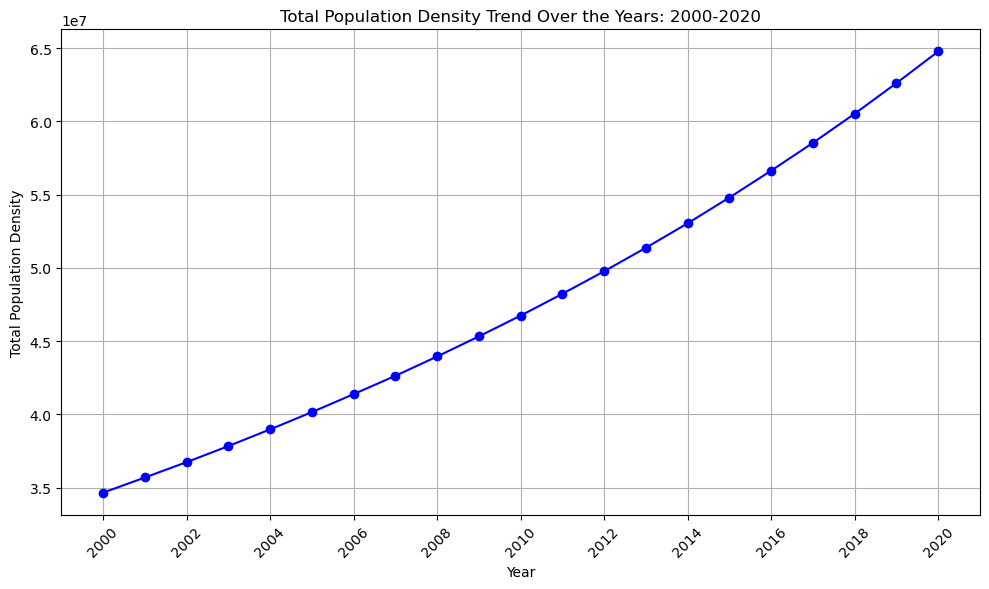

In [42]:
# Total population density per year
year_columns = pop_density_df.columns[2:]
annual_total_density = pop_density_df[year_columns].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(annual_total_density.index, annual_total_density.values, marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Total Population Density")
plt.title("Total Population Density Trend Over the Years: 2000-2020")
plt.grid(True)
plt.xticks(ticks=annual_total_density.index[::2], rotation=45)

plt.tight_layout()
plt.show()

**4. Data Extraction & Visualization: Kenya's Income Level**

% of population living in households with consumption or income per person below the $2.15 poverty line.

In [43]:
import geopandas as gpd

shp_file_path = '../data/income_level_data/GSAP_AM24_2021.shp'
gdf = gpd.read_file(shp_file_path)

print(gdf.shape)
gdf.head()

(1835, 10)


code  geo_year geo_source geo_level  geo_idvar geo_id   geo_nvar  \
0  ABW       NaN       None      None       None   None       None   
1  AFG       NaN       None      None       None   None       None   
2  AGO    2015.0       GAUL         1  ADM1_CODE    398  ADM1_NAME   
3  AGO    2015.0       GAUL         1  ADM1_CODE    399  ADM1_NAME   
4  AGO    2015.0       GAUL         1  ADM1_CODE    400  ADM1_NAME   

        geo_name            geo_code  \
0  Aruba (Neth.)        ABW_2020_WB0   
1    Afghanistan        AFG_2020_WB0   
2          Bengo  AGO_2015_GAUL1_398   
3       Benguela  AGO_2015_GAUL1_399   
4            Bie  AGO_2015_GAUL1_400   

                                            geometry  
0  POLYGON ((-69.99694 12.57758, -69.93639 12.531...  
1  POLYGON ((74.54235 37.02167, 74.54742 37.01567...  
2  POLYGON ((13.14401 -9.33313, 13.14405 -9.33316...  
3  POLYGON ((13.79886 -11.77102, 13.79883 -11.771...  
4  POLYGON ((16.79741 -10.77021, 16.80907 -10.772...

In [44]:
kenya_income_level = gdf[gdf['code'] == 'KEN']

print(kenya_income_level.shape)
kenya_income_level.head()

(47, 10)


code  geo_year geo_source geo_level geo_idvar   geo_id geo_nvar  \
679  KEN    2022.0       GADM         1     GID_1  KEN.1_1   NAME_1   
680  KEN    2022.0       GADM         1     GID_1  KEN.2_1   NAME_1   
681  KEN    2022.0       GADM         1     GID_1  KEN.3_1   NAME_1   
682  KEN    2022.0       GADM         1     GID_1  KEN.4_1   NAME_1   
683  KEN    2022.0       GADM         1     GID_1  KEN.5_1   NAME_1   

            geo_name                geo_code  \
679          Baringo  KEN_2022_GADM1_KEN.1_1   
680            Bomet  KEN_2022_GADM1_KEN.2_1   
681          Bungoma  KEN_2022_GADM1_KEN.3_1   
682            Busia  KEN_2022_GADM1_KEN.4_1   
683  Elgeyo-Marakwet  KEN_2022_GADM1_KEN.5_1   

                                              geometry  
679  MULTIPOLYGON (((35.73880 -0.19544, 35.72428 -0...  
680  POLYGON ((35.26033 -1.01608, 35.26021 -1.01621...  
681  POLYGON ((34.91305 0.85131, 34.91327 0.85148, ...  
682  POLYGON ((34.02698 -0.01568, 34.02082 -0.02018...  
683  MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2...

In [45]:
import pandas as pd
# Create an empty list to store the results
rows = []

# Iterate through each geometry and extract latitude and longitude
for index, row in kenya_income_level.iterrows():
    # Extract the geometry
    geom = row['geometry']

    # Handle MULTIPOLYGON or POLYGON types
    if geom.geom_type == 'MultiPolygon':
        for polygon in geom.geoms:  # Use geom.geoms to access individual polygons
            for coord in polygon.exterior.coords:
                rows.append({
                    'County': row['geo_name'],
                    'Latitude': coord[1],
                    'Longitude': coord[0]
                })
    elif geom.geom_type == 'Polygon':
        for coord in geom.exterior.coords:
            rows.append({
                'Latitude': coord[1],
                'Longitude': coord[0],
                'County': row['geo_name']
            })

kenya_income_level = pd.DataFrame(rows)
print(kenya_income_level.shape)
kenya_income_level

(274900, 3)


County  Latitude  Longitude
0          Baringo -0.195439  35.738800
1          Baringo -0.198901  35.724277
2          Baringo -0.195616  35.723232
3          Baringo -0.195289  35.723129
4          Baringo -0.194905  35.723007
...            ...       ...        ...
274895  West Pokot  1.190623  35.422623
274896  West Pokot  1.189342  35.422203
274897  West Pokot  1.188469  35.422005
274898  West Pokot  1.187765  35.421890
274899  West Pokot  1.187648  35.421947

[274900 rows x 3 columns]

In [46]:
print(kenya_income_level.County.nunique())
kenya_income_level.County.unique()

47


array(['Baringo', 'Bomet', 'Bungoma', 'Busia', 'Elgeyo-Marakwet', 'Embu',
       'Garissa', 'Homa Bay', 'Isiolo', 'Kajiado', 'Kakamega', 'Kericho',
       'Kiambu', 'Kilifi', 'Kirinyaga', 'Kisii', 'Kisumu', 'Kitui',
       'Kwale', 'Laikipia', 'Lamu', 'Machakos', 'Makueni', 'Mandera',
       'Marsabit', 'Meru', 'Migori', 'Mombasa', "Murang'a", 'Nairobi',
       'Nakuru', 'Nandi', 'Narok', 'Nyamira', 'Nyandarua', 'Nyeri',
       'Samburu', 'Siaya', 'Taita Taveta', 'Tana River', 'Tharaka-Nithi',
       'Trans Nzoia', 'Turkana', 'Uasin Gishu', 'Vihiga', 'Wajir',
       'West Pokot'], dtype=object)

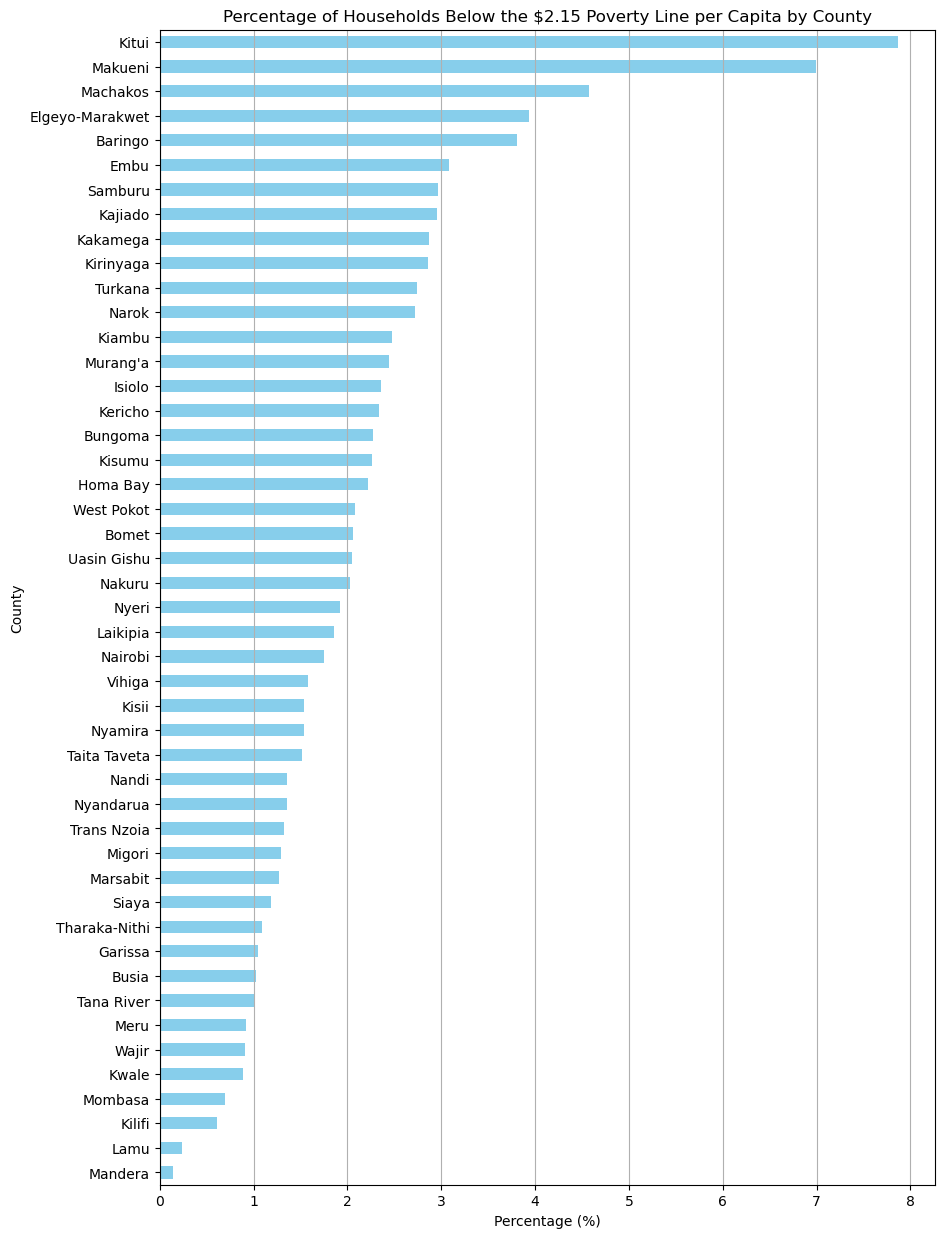

In [47]:
import matplotlib.pyplot as plt

# Count occurrences of each county
county_counts = kenya_income_level['County'].value_counts()

# Calculate the percentage of each county
county_percentage = (county_counts / county_counts.sum()) * 100
county_percentage = county_percentage.sort_values(ascending=True)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 15))
county_percentage.plot(kind='barh', color='skyblue')

# Adding titles and labels
plt.title('Percentage of Households Below the $2.15 Poverty Line per Capita by County')
plt.xlabel('Percentage (%)')
plt.ylabel('County')

# Show the plot
plt.grid(axis='x')
plt.show()

**5. Data Extraction & Visualization: Grid Infrustructure**

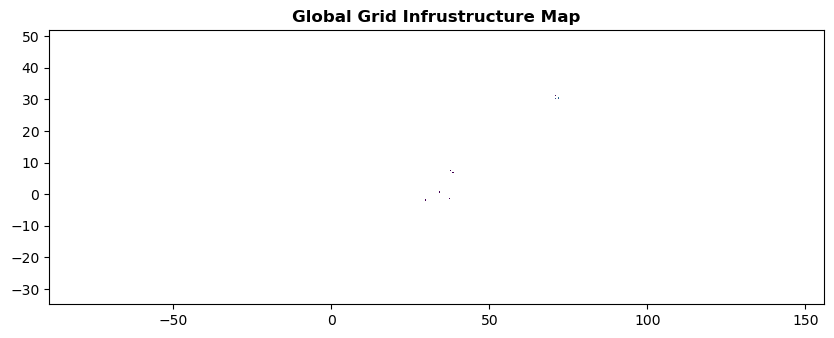

In [48]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Open the .tif raster file
with rasterio.open('../data/grid_infrustructure_data/global_data/global_1_1_1_1_1_0.tif') as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the raster data
    show(src, ax=ax, title="Global Grid Infrustructure Map")

plt.show()

In [49]:
import rasterio
import pandas as pd
from rasterio.transform import rowcol

# Path to the TIFF file
tiff_path = '../data/grid_infrustructure_data/global_data/global_1_1_1_1_1_0.tif'

# Open the TIFF file
with rasterio.open(tiff_path) as src:
    
    grid_array = src.read(1) 
    transform = src.transform
    width, height = src.width, src.height

    # Lists to store the results
    latitudes = []
    longitudes = []
    grid_values = []

    # Loop through each pixel to get its coordinate and value
    for row in range(height):
        for col in range(width):
            # Get the grid value at the current pixel
            grid_value = grid_array[row, col]

            # Ignore nodata values
            if grid_value == src.nodata:
                continue

            # Convert row, col to latitude, longitude
            lon, lat = rasterio.transform.xy(transform, row, col, offset='center')

            # Append to lists
            latitudes.append(lat)
            longitudes.append(lon)
            grid_values.append(grid_value)

# Create a DataFrame
grid_df = pd.DataFrame({
    "Latitude": latitudes,
    "Longitude": longitudes,
    "GridValue": grid_values
})

grid_df


Latitude   Longitude  GridValue
0        51.899252   99.259307          7
1        51.689252   99.309307          3
2        51.669252   99.319307          5
3        51.659252  100.529307          3
4        51.639252  100.859307          5
...            ...         ...        ...
4235274 -34.820748   20.059307         98
4235275 -34.830748   19.999307          1
4235276 -34.830748   20.009307          1
4235277 -34.830748   20.019307          1
4235278 -34.830748   20.029307          1

[4235279 rows x 3 columns]

In [50]:
# Extract Kenya's coordinates
import pandas as pd

kenya_grid_df = grid_df[(grid_df['Latitude'] >= -4.7) & (grid_df['Latitude'] <= 5.1) &
              (grid_df['Longitude'] >= 33.5) & (grid_df['Longitude'] <= 41.9)]

print(kenya_grid_df.isna().sum())
kenya_grid_df 


Latitude     0
Longitude    0
GridValue    0
dtype: int64


Latitude  Longitude  GridValue
2410365  5.099252  33.529307          1
2410366  5.099252  33.539307          1
2410367  5.099252  36.089307          1
2410368  5.099252  36.389307          3
2410369  5.099252  36.469307          3
...           ...        ...        ...
3023566 -4.690748  39.109307          1
3023567 -4.690748  39.129307          1
3023568 -4.690748  39.139307          3
3023569 -4.690748  39.149307          3
3023570 -4.690748  39.179307          5

[203255 rows x 3 columns]

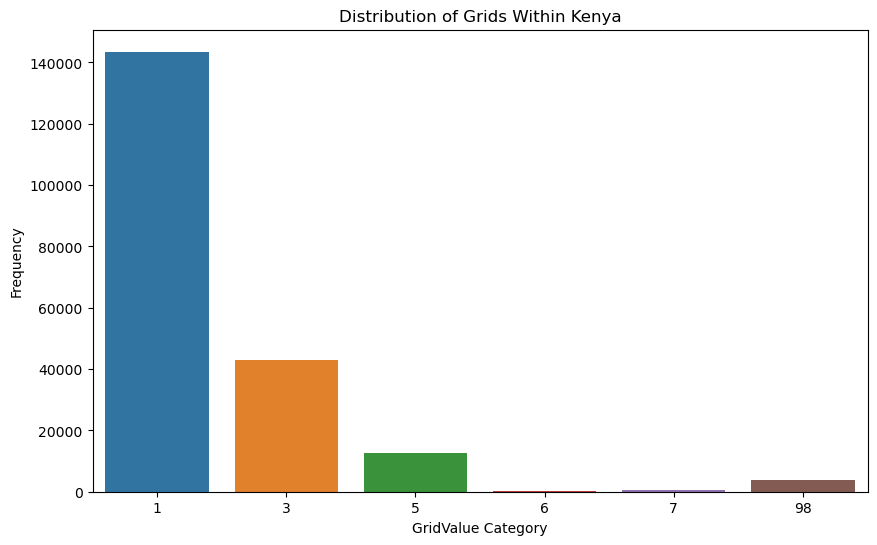

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=kenya_grid_df, x='GridValue')
plt.title("Distribution of Grids Within Kenya")
plt.xlabel("GridValue Category")
plt.ylabel("Frequency")
plt.show()


<Figure size 1200x800 with 0 Axes>

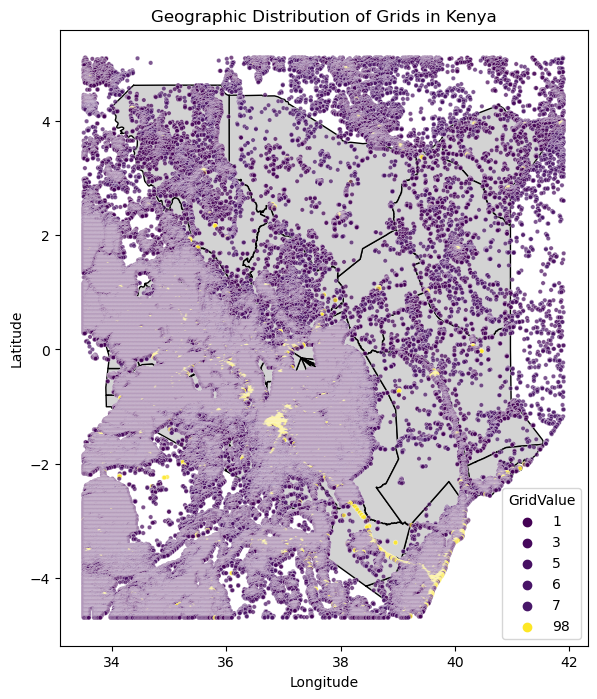

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

kenya_shapefile = gpd.read_file("../data/income_level_data/GSAP_AM24_2021.shp",
                                engine='pyogrio',
                                   where="code='KEN'")


# Scatter plot of grid values
plt.figure(figsize=(12, 8))

# Kenya boundary first on the background
ax = kenya_shapefile.plot(figsize=(12, 8), color='lightgrey', edgecolor='black')

# Plot the scatter plot of your grid values
sns.scatterplot(data=kenya_grid_df, x='Longitude', y='Latitude', hue='GridValue', palette='viridis', s=10, alpha=0.7, ax=ax)


plt.title("Geographic Distribution of Grids in Kenya")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="GridValue")

plt.show()


### Merging Data

In [53]:
electricity_df.head()

Year  Electricity demand - TWh  Electricity generation - TWh
0  2000                      4.51                          4.31
1  2001                      4.98                          4.81
2  2002                      5.37                          5.15
3  2003                      5.67                          5.48
4  2004                      6.32                          6.16

In [54]:
wind_speed_df.head()

Latitude  Longitude  Wind Speed
0  4.622019  35.915323    6.276936
1  4.622019  35.917823    6.260634
2  4.622019  35.920323    6.232945
3  4.622019  35.922823    6.241162
4  4.622019  35.925323    6.216225

In [55]:
#  Add a new row for the year 2024 with NaN placeholder values
df_electricity = pd.concat([electricity_df, pd.DataFrame({'Year': [2024], 
                                                          'Electricity demand - TWh': [float('nan')], 
                                                          'Electricity generation - TWh': [float('nan')]})],
                           ignore_index=True)

In [56]:
electricity_df['key'] = 1
wind_speed_df['key'] = 1

In [57]:
# Perform a cross join by merging on the 'key' column and then dropping it
merged_df = pd.merge(electricity_df, wind_speed_df, on='key').drop('key', axis=1)
merged_df.head()

MemoryError: Unable to allocate 3.05 GiB for an array with shape (2, 204913512) and data type float64

Missing data in latitudes and longitudes

In [ ]:
from scipy.spatial import cKDTree
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
# Add a column to indicate countrywide data for missing longitudes and latitudes
merged_df['Is_Countrywide'] = merged_df['Latitude'].isna() & merged_df['Longitude'].isna()

Missing Electricity Generation and Demand for Countrywide Data using ARIMA

In [ ]:
# Using ARIMA to forecast countrywide generation and demand if missing
if merged_df['Is_Countrywide'].any():
    countrywide_df = merged_df[merged_df['Is_Countrywide']]
    
    if countrywide_df['Electricity demand - TWh'].isna().any():
        demand_model = ARIMA(countrywide_df['Electricity demand - TWh'].dropna(), order=(1, 1, 1))
        demand_model_fit = demand_model.fit()
        demand_forecast = demand_model_fit.forecast(steps=1)
        merged_df.loc[(merged_df['Year'] == 2024) & (merged_df['Is_Countrywide']), 'Electricity demand - TWh'] = demand_forecast.values

    if countrywide_df['Electricity generation - TWh'].isna().any():
        generation_model = ARIMA(countrywide_df['Electricity generation - TWh'].dropna(), order=(1, 1, 1))
        generation_model_fit = generation_model.fit()
        generation_forecast = generation_model_fit.forecast(steps=1)
        merged_df.loc[(merged_df['Year'] == 2024) & (merged_df['Is_Countrywide']), 'Electricity generation - TWh'] = generation_forecast.values

Fill Missing Wind Speed, Electricity Generation, and Demand for Specific Points

In [ ]:
# Separate rows with specific coordinates and missing values
specific_points = merged_df[~merged_df['Is_Countrywide']]

In [ ]:
# Separate known and missing values
known_values = specific_points.dropna(subset=['Wind Speed', 'Electricity demand - TWh', 'Electricity generation - TWh'])
missing_values = specific_points[specific_points[['Wind Speed', 'Electricity demand - TWh', 'Electricity generation - TWh']].isna().any(axis=1)]

In [ ]:
# Fill missing wind speeds based on spatial proximity (IDW)
tree = cKDTree(known_values[['Latitude', 'Longitude']])
def inverse_distance_weighting(lat, lon, k=3):
    distances, indices = tree.query([lat, lon], k=k)
    weights = 1 / (distances + 1e-5)
    values = known_values.iloc[indices]['Wind Speed'].values
    return np.sum(weights * values) / np.sum(weights)

In [ ]:
# Apply IDW for Wind Speed if missing
for i, row in missing_values.iterrows():
    if pd.isna(row['Wind Speed']):
        lat, lon = row['Latitude'], row['Longitude']
        merged_df.loc[i, 'Wind Speed'] = inverse_distance_weighting(lat, lon)

In [ ]:
# For missing point-specific electricity generation/demand, use national average or nearest-neighbor values
country_avg_demand = merged_df[merged_df['Is_Countrywide']]['Electricity demand - TWh'].mean()
country_avg_generation = merged_df[merged_df['Is_Countrywide']]['Electricity generation - TWh'].mean()

In [ ]:
for i, row in missing_values.iterrows():
    if pd.isna(row['Electricity demand - TWh']):
        merged_df.loc[i, 'Electricity demand - TWh'] = country_avg_demand
    if pd.isna(row['Electricity generation - TWh']):
        merged_df.loc[i, 'Electricity generation - TWh'] = country_avg_generation


KeyboardInterrupt: 

In [ ]:
import numpy as np
from scipy.spatial import cKDTree
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import concurrent.futures
import matplotlib.pyplot as plt
import time

In [ ]:
# Start measuring execution time
start_time = time.time()

In [ ]:
# Forecast Missing Countrywide Electricity Demand and Generation Using Exponential Smoothing
countrywide_df = merged_df[merged_df['Latitude'].isna() & merged_df['Longitude'].isna()]

In [ ]:
# Forecast demand and generation for countrywide data if missing
if countrywide_df['Electricity demand - TWh'].isna().any():
    demand_model = ExponentialSmoothing(countrywide_df['Electricity demand - TWh'].dropna(), trend='add')
    demand_model_fit = demand_model.fit()
    demand_forecast = demand_model_fit.forecast(steps=1)
    merged_df.loc[(merged_df['Year'] == 2024) & (merged_df['Latitude'].isna()), 'Electricity demand - TWh'] = demand_forecast.values

if countrywide_df['Electricity generation - TWh'].isna().any():
    generation_model = ExponentialSmoothing(countrywide_df['Electricity generation - TWh'].dropna(), trend='add')
    generation_model_fit = generation_model.fit()
    generation_forecast = generation_model_fit.forecast(steps=1)
    merged_df.loc[(merged_df['Year'] == 2024) & (merged_df['Latitude'].isna()), 'Electricity generation - TWh'] = generation_forecast.values

In [ ]:
# Fill Missing Wind Speed Using IDW on a Reduced Subset

# Extract a smaller subset of specific points with known wind speed
specific_points = merged_df.dropna(subset=['Latitude', 'Longitude', 'Wind Speed'])
if len(specific_points) > 1000:
    specific_points = specific_points.sample(1000)  # Sampling 1000 points for faster processing

In [ ]:
# Define IDW function
def inverse_distance_weighting(row, k=3):
    distances, indices = tree.query([row['Latitude'], row['Longitude']], k=k)
    weights = 1 / (distances + 1e-5)
    values = specific_points.iloc[indices]['Wind Speed'].values
    return np.sum(weights * values) / np.sum(weights)

# Function to fill missing wind speed using parallel processing
def fill_missing_wind_speed(df):
    missing_wind_speed = df[df['Wind Speed'].isna()]
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(inverse_distance_weighting, [row for _, row in missing_wind_speed.iterrows()])
    df.loc[missing_wind_speed.index, 'Wind Speed'] = list(results)
    return df

# Apply the function to fill missing wind speeds
merged_df = fill_missing_wind_speed(merged_df)

In [ ]:
# Calculate countrywide averages
country_avg_demand = merged_df[merged_df['Latitude'].isna()]['Electricity demand - TWh'].mean()
country_avg_generation = merged_df[merged_df['Latitude'].isna()]['Electricity generation - TWh'].mean()

# Apply countrywide averages for missing values in point-specific rows
merged_df['Electricity demand - TWh'] = merged_df['Electricity demand - TWh'].fillna(country_avg_demand)
merged_df['Electricity generation - TWh'] = merged_df['Electricity generation - TWh'].fillna(country_avg_generation)

# End measuring execution time
end_time = time.time()
print("Execution time:", end_time - start_time, "seconds")

# Display final counts of remaining missing values to verify filling
missing_counts = merged_df.isnull().sum()
print(missing_counts[missing_counts > 0])

Execution time: 239.87863302230835 seconds
Electricity demand - TWh        8538063
Electricity generation - TWh    8538063
dtype: int64


In [ ]:
# Forecast Missing Electricity Demand and Generation for 2024 Using Exponential Smoothing
countrywide_df = merged_df[merged_df['Latitude'].isna() & merged_df['Longitude'].isna()]

In [ ]:
# Exponential Smoothing is faster and can handle trends well
if countrywide_df['Electricity demand - TWh'].isna().any():
    demand_model = ExponentialSmoothing(countrywide_df['Electricity demand - TWh'].dropna(), trend='add')
    demand_model_fit = demand_model.fit()
    demand_forecast = demand_model_fit.forecast(steps=1)
    merged_df.loc[(merged_df['Year'] == 2024) & (merged_df['Latitude'].isna()), 'Electricity demand - TWh'] = demand_forecast.values

if countrywide_df['Electricity generation - TWh'].isna().any():
    generation_model = ExponentialSmoothing(countrywide_df['Electricity generation - TWh'].dropna(), trend='add')
    generation_model_fit = generation_model.fit()
    generation_forecast = generation_model_fit.forecast(steps=1)
    merged_df.loc[(merged_df['Year'] == 2024) & (merged_df['Latitude'].isna()), 'Electricity generation - TWh'] = generation_forecast.values

In [ ]:
# Build a KD-tree with a subset of the data if too large
specific_points = merged_df.dropna(subset=['Latitude', 'Longitude', 'Wind Speed'])
if len(specific_points) > 1000:
    specific_points = specific_points.sample(1000)  # Sample 1000 points for faster processing
tree = cKDTree(specific_points[['Latitude', 'Longitude']])

# IDW function for Wind Speed
def inverse_distance_weighting(row, k=3):
    distances, indices = tree.query([row['Latitude'], row['Longitude']], k=k)
    weights = 1 / (distances + 1e-5)
    values = specific_points.iloc[indices]['Wind Speed'].values
    return np.sum(weights * values) / np.sum(weights)

# Parallelize IDW Calculation
def fill_missing_wind_speed(df):
    missing_wind_speed = df[df['Wind Speed'].isna()]
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = executor.map(inverse_distance_weighting, [row for _, row in missing_wind_speed.iterrows()])
    df.loc[missing_wind_speed.index, 'Wind Speed'] = list(results)
    return df

merged_df = fill_missing_wind_speed(merged_df)

In [ ]:
# For missing point-specific electricity generation/demand, use countrywide averages
country_avg_demand = merged_df[merged_df['Latitude'].isna()]['Electricity demand - TWh'].mean()
country_avg_generation = merged_df[merged_df['Latitude'].isna()]['Electricity generation - TWh'].mean()
# merged_df['Electricity demand - TWh'].fillna(country_avg_demand, inplace=True)
# merged_df['Electricity generation - TWh'].fillna(country_avg_generation, inplace=True)
merged_df['Electricity demand - TWh'] = merged_df['Electricity demand - TWh'].fillna(country_avg_demand)
merged_df['Electricity generation - TWh'] = merged_df['Electricity generation - TWh'].fillna(country_avg_generation)

# Display the merged DataFrame with filled values
print(merged_df)

         Latitude  Longitude  Wind Speed  Year  Electricity demand - TWh  \
0        4.622019  35.915323    6.276936  2024                       NaN   
1        4.622019  35.917823    6.260634  2024                       NaN   
2        4.622019  35.920323    6.232945  2024                       NaN   
3        4.622019  35.922823    6.241162  2024                       NaN   
4        4.622019  35.925323    6.216225  2024                       NaN   
...           ...        ...         ...   ...                       ...   
8538058 -4.887981  39.480323    6.142080  2024                       NaN   
8538059 -4.890481  39.472823    6.143734  2024                       NaN   
8538060 -4.890481  39.475323    6.142651  2024                       NaN   
8538061 -4.890481  39.477823    6.141578  2024                       NaN   
8538062 -4.890481  39.480323    6.140533  2024                       NaN   

         Electricity generation - TWh  Is_Countrywide  
0                              

In [ ]:
missing_counts = merged_df.isnull().sum()
print(missing_counts[missing_counts > 0])

Electricity demand - TWh        8538063
Electricity generation - TWh    8538063
dtype: int64


In [ ]:
# Fill null values in the population density columns

from sklearn.impute import KNNImputer
import pandas as pd

# Population density columns
pop_density_columns = [col for col in merged_df.columns if "Pop_Density" in col]

# columns for imputation
knn_data = merged_df[['Latitude', 'Longitude'] + pop_density_columns]
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed_data = knn_imputer.fit_transform(knn_data)

# Imputated data into df
knn_imputed_df = pd.DataFrame(knn_imputed_data, columns=knn_data.columns)
merged_df.update(knn_imputed_df)

merged_df.isna().sum()

**6. Machine Learning**

Machine learning